In [15]:
import cv2
import numpy as np
import pandas as pd
import glob
import os

In [18]:
def extract_features(image_path):
    # 1. Load Image (OpenCV loads as BGR by default)
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        return None
    
    # 2. Convert to HSV
    # OpenCV Ranges: H (0-179), S (0-255), V (0-255)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(img_hsv)
    
    # 3. Convert to YCrCb (Note: OpenCV uses YCrCb, not YCbCr)
    # OpenCV Ranges: Y, Cr, Cb (0-255)
    img_ycrcb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img_ycrcb)
    
    # 4. Compute Standard Deviation (flattening happens implicitly or explicitly)
    # We use ddof=1 for sample standard deviation, or default 0 for population
    # "flattening whole ndarray" -> np.std(channel) does this automatically
    features = {
        'sd_Hue': np.std(h),
        'sd_Sat': np.std(s),
        'sd_Val': np.std(v),
        'sd_Y':   np.std(y),
        'sd_Cr':  np.std(cr),
        'sd_Cb':  np.std(cb)
    }
    
    return features

# --- BATCH PROCESSING ---
def build_dataset(image_folder):
    data = []
    # Assumes images are jpg/png
    files = glob.glob(os.path.join(image_folder, "*.*"))
    
    for f in files:
        if f.lower().endswith(('.png', '.jpg', '.jpeg')):
            feats = extract_features(f)
            if feats:
                data.append(feats)
    
    # Convert list of dicts to DataFrame for easy plotting
    df = pd.DataFrame(data)
    return df

# USAGE:
# df = build_dataset("path/to/your/images")
# print(df.head())


In [19]:
df = build_dataset("tapochki_photos/preprocessed/")
print(df.head())


      sd_Hue     sd_Sat     sd_Val       sd_Y     sd_Cr     sd_Cb
0  14.587963  34.246476  42.757879  42.592519  3.105397  3.393974
1   1.632792  27.943605  24.013526  23.170298  1.927096  2.230599
2  17.095603  61.511743  32.761407  36.338543  9.011034  9.278120
3  25.393545  63.090241  43.886067  40.718448  4.549291  6.032679
4   3.031814  55.844808  58.389983  56.483549  6.586495  7.654049


In [20]:
print(df.shape)

(88, 6)


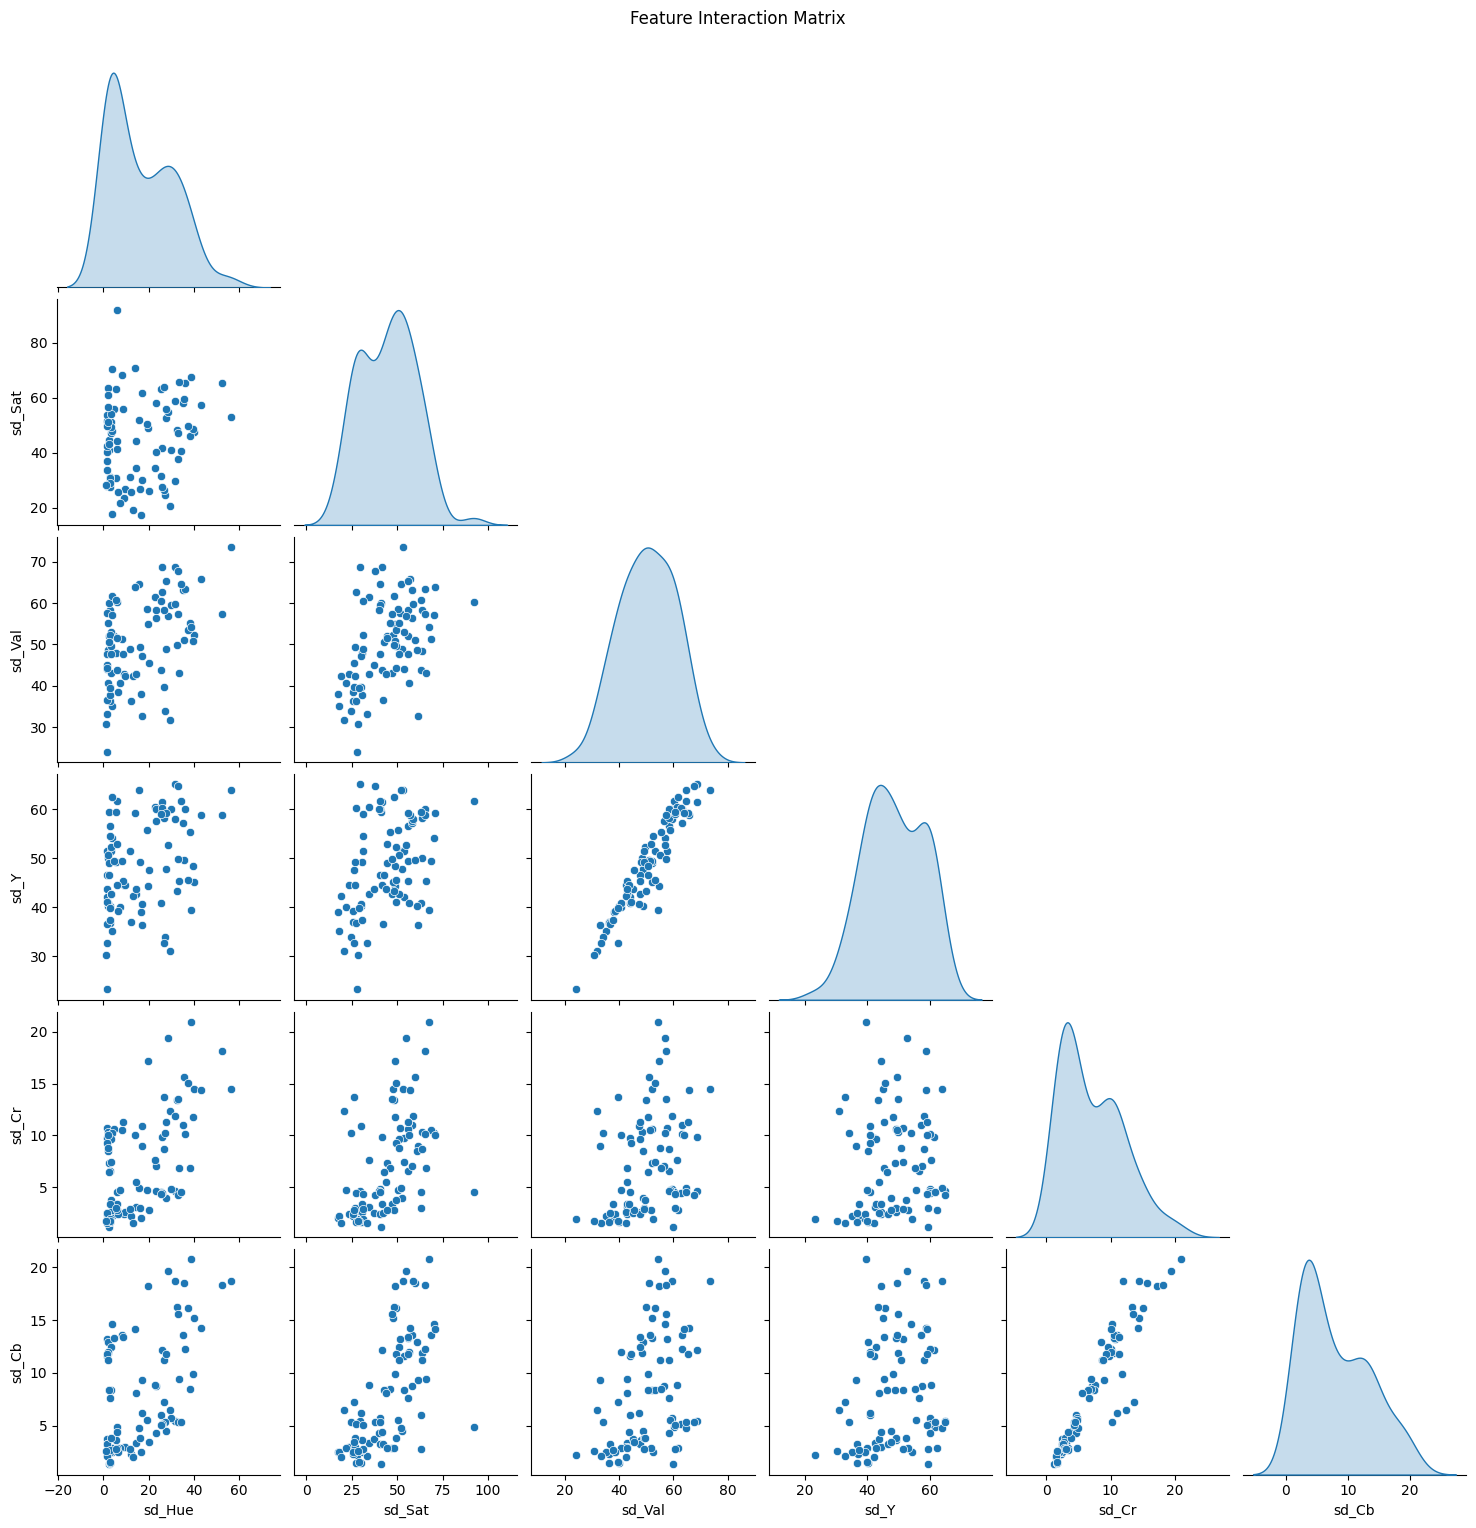

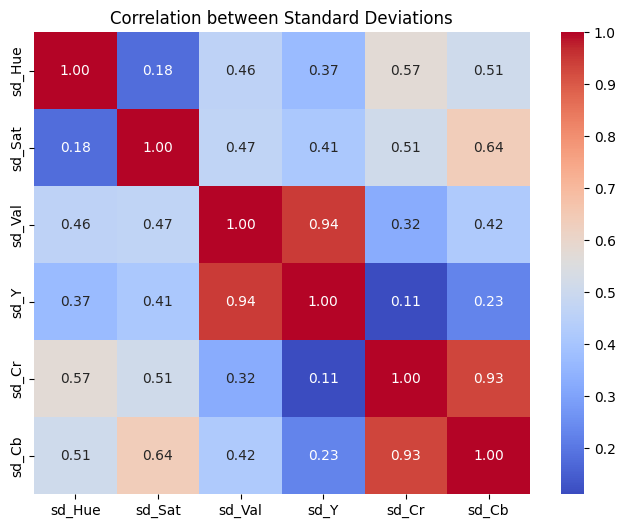

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pair Plot (Scatter Matrix)
# Shows scatter plots for every pair of features
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Feature Interaction Matrix", y=1.02)
plt.show()

# 2. Correlation Heatmap
# Quantitative view of relationships
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Standard Deviations")
plt.show()
